<a href="https://colab.research.google.com/github/krish1209/Crypto-Forecasting/blob/main/ARIMA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import sklearn
import seaborn as sns
import warnings
%matplotlib inline

In [13]:
algoUsdData = pd.read_csv("All-datasets.csv")

In [15]:
algoUsdData.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200.0
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780.0
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220.0
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250.0
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440.0


In [16]:
algoUsdData.info


<bound method DataFrame.info of              Date      Open      High       Low     Close  Adj Close  \
0      2017-11-09  0.025160  0.035060  0.025006  0.032053   0.032053   
1      2017-11-10  0.032219  0.033348  0.026451  0.027119   0.027119   
2      2017-11-11  0.026891  0.029659  0.025684  0.027437   0.027437   
3      2017-11-12  0.027480  0.027952  0.022591  0.023977   0.023977   
4      2017-11-13  0.024364  0.026300  0.023495  0.025808   0.025808   
...           ...       ...       ...       ...       ...        ...   
47414  2022-03-01  0.782070  0.800635  0.761234  0.784862   0.784862   
47415  2022-03-02  0.784876  0.784891  0.759598  0.768496   0.768496   
47416  2022-03-03  0.768532  0.783925  0.738920  0.752185   0.752185   
47417  2022-03-04       NaN       NaN       NaN       NaN        NaN   
47418  2022-03-05  0.710560  0.766064  0.707923  0.754938   0.754938   

             Volume  
0      1.871620e+07  
1      6.766780e+06  
2      5.532220e+06  
3      7.280250

In [19]:
algoUsdData = pd.read_csv("All-datasets.csv",index_col=[0],parse_dates=True)

In [21]:
type(algoUsdData)
# We convert the DataFrame to series to get a better view of the time series arima forecasting working.

pandas.core.frame.DataFrame

In [26]:
algoUsdData  = algoUsdData['Adj Close'][0:]

KeyError: ignored

In [25]:
type(algoUsdData)

pandas.core.series.Series

In [24]:
algoUsdData.columns =  ['Adj Close']
#We use Adj close for arima model

In [23]:
algoUsdData.head()

Date
2017-11-09    0.032053
2017-11-10    0.027119
2017-11-11    0.027437
2017-11-12    0.023977
2017-11-13    0.025808
Name: Adj Close, dtype: float64

**VISUALIZING DATA**

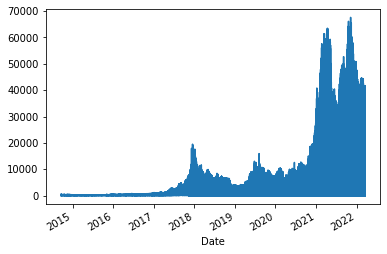

In [27]:
algoUsdData.plot()

**CHECKING IF IT HAS ANY NULL VALUES IN ANY COIN**

In [40]:
algoUsdData.isnull().values.any()

False

In [41]:
algoUsdData.isnull().sum()

0

**OUR DATA IS MISSING 272 VALUES WHICH ALSO INCLUDE WHOLE ROWS,**
So now we'll remove these null values and rows completely

In [35]:
algoUsdData.dropna(inplace=True)

In [36]:
algoUsdData

Date
2017-11-09    0.032053
2017-11-10    0.027119
2017-11-11    0.027437
2017-11-12    0.023977
2017-11-13    0.025808
                ...   
2022-02-28    0.782044
2022-03-01    0.784862
2022-03-02    0.768496
2022-03-03    0.752185
2022-03-05    0.754938
Name: Adj Close, Length: 47147, dtype: float64